In [6]:
!pip install sqlalchemy
!pip install sql
!pip install mysql
!pip install pymysql
!pip install mysql-connector-python

  Using cached mysql-0.0.3-py3-none-any.whl.metadata (746 bytes)
  Using cached mysqlclient-2.2.4.tar.gz (90 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Trying pkg-config --exists mysqlclient
      Command 'pkg-config --exists mysqlclient' returned non-zero exit status 1.
      Trying pkg-config --exists mariadb
      Command 'pkg-config --exists mariadb' returned non-zero exit status 1.
      Trying pkg-config --exists libmariadb
      Command 'pkg-config --exists libmariadb' returned non-zero exit status 1.
      Traceback (most recent call last):
        File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pip/

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql
from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()


In [8]:
user = "root"
password = "1234abcd"
host = "127.0.0.1"
port = "3306"
db = "miniproject_mysql"
from sqlalchemy import create_engine
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{db}')

In [9]:
# Practicing: 
query1 = "SELECT * FROM Accounts"
df_read1 = pd.read_sql(query1, con=engine)
df_read1

,AccountId,CustomerId,Accountname,Balance
0,1,1,Auto Loan Account,8500
1,2,2,Checking Account,6072
2,3,3,Checking Account,3248
3,4,4,Home Loan Account,3535
4,5,5,Credit Card Account,12895
...,...,...,...,...
16995,16996,16996,Checking Account,4459
16996,16997,16997,Money Market Account,17722
16997,16998,16998,Personal Loan Account,7169
16998,16999,16999,Savings Account,12139


In [10]:
query2 = "SELECT c.*,  a.AccountId,  a.AccountName, a.Balance,  cd.CardId, cd.CardLimit, cd.Debt  FROM Customers c JOIN Accounts a ON c.CustomerId = a.CustomerId JOIN Cards cd ON c.CustomerId = cd.CustomerId; "
df_read2 = pd.read_sql(query2, con=engine)
df_read2

,CustomerId,Firstname,Lastname,Email,AccountId,AccountName,Balance,CardId,CardLimit,Debt
0,1,Wallace,Haldene,whaldene0@marriott.com,1,Auto Loan Account,8500,1,3305065,9766462
1,2,Danna,Bewsey,dbewsey1@scribd.com,2,Checking Account,6072,2,6373377,9924988
2,3,Theodore,Aubert,taubert2@fc2.com,3,Checking Account,3248,3,6168239,2406348
3,4,Martica,Croxon,mcroxon3@blinklist.com,4,Home Loan Account,3535,4,4767247,7547652
4,5,Blaine,Hedderly,bhedderly4@shareasale.com,5,Credit Card Account,12895,5,365005,1591505
...,...,...,...,...,...,...,...,...,...,...
16995,16996,Bernadette,Kuhn,Bernadette12@hotmail.com,16996,Checking Account,4459,16996,1221628,5043960
16996,16997,Ralph,Ruecker,Ralph.Ruecker68@hotmail.com,16997,Money Market Account,17722,16997,7804185,1787587
16997,16998,Melissa,Schmitt,Melissa16@hotmail.com,16998,Personal Loan Account,7169,16998,5820152,8781396
16998,16999,Alice,Denesik,Alice1@gmail.com,16999,Savings Account,12139,16999,561379,6436715


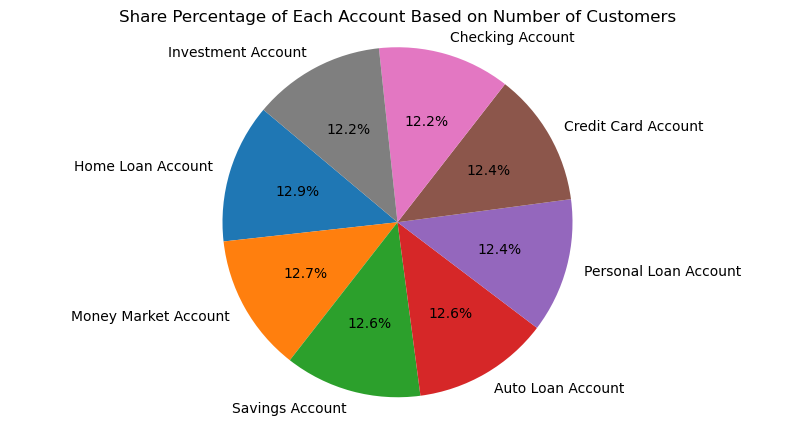

In [11]:
# calculate the share percentage of each AccountName based on the number of customers that use it  
query3 = "SELECT a.AccountName, COUNT(DISTINCT c.CustomerId) AS NumberOfCustomersUsingAccount,100.0 * COUNT(DISTINCT c.CustomerId) / SUM(COUNT(DISTINCT c.CustomerId)) OVER () AS SharePercentage FROM Customers c JOIN Accounts a ON c.CustomerId = a.CustomerId GROUP BY a.AccountName ORDER BY SharePercentage DESC; "
df_read3 = pd.read_sql(query3, con=engine)

# Plotting the pie chart
plt.figure(figsize=(10, 5))  # Sets the figure size
plt.pie(df_read3['NumberOfCustomersUsingAccount'], labels=df_read3['AccountName'], autopct='%1.1f%%', startangle=140)
plt.title('Share Percentage of Each Account Based on Number of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



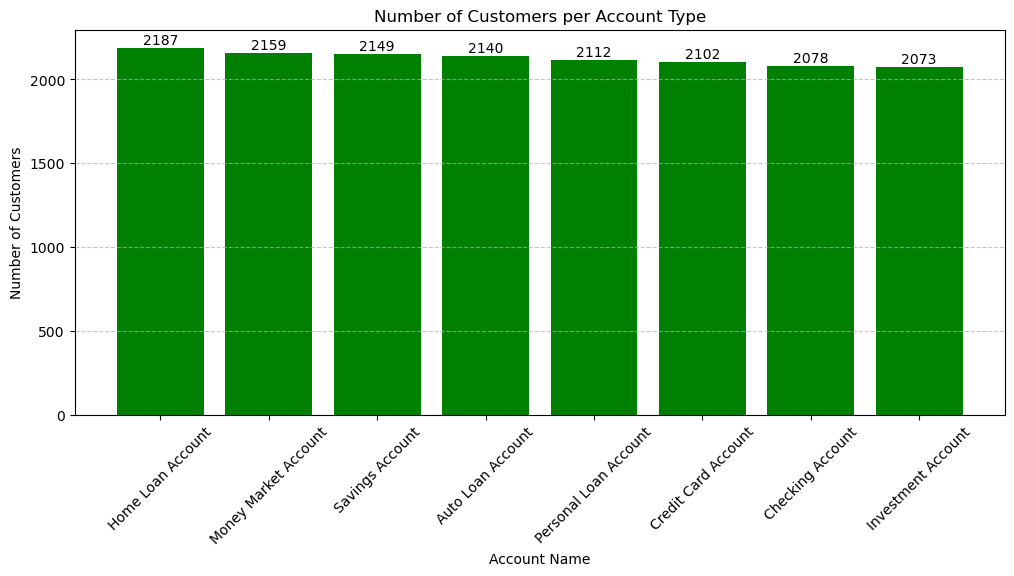

In [12]:
df_read3 = pd.read_sql(query3, con=engine)

# Plotting the bar chart
plt.figure(figsize=(12, 5))  # Sets the figure size
bars = plt.bar(df_read3['AccountName'], df_read3['NumberOfCustomersUsingAccount'], color='green')  # Creates a bar chart
plt.xlabel('Account Name')  # X-axis label
plt.ylabel('Number of Customers')  # Y-axis label
plt.title('Number of Customers per Account Type')  # Chart title
plt.xticks(rotation=45)  # Rotates X-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a grid for easier estimation of values

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

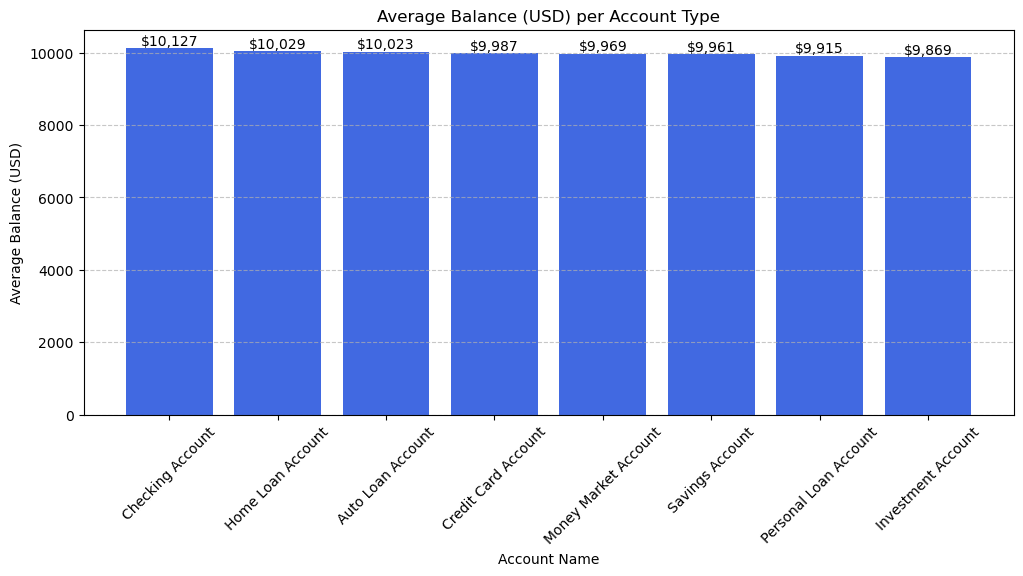

In [13]:
# Calculating the average balance for each account name

query4 = "SELECT a.Accountname, AVG(a.Balance) AS AverageBalance  FROM Customers c JOIN Accounts a ON c.CustomerId = a.CustomerId GROUP BY a.Accountname ORDER BY AverageBalance DESC;"
df_read4 = pd.read_sql(query4, con=engine)
df_read4



# Plotting the bar chart
plt.figure(figsize=(12, 5))  # Sets the figure size
bars = plt.bar(df_read4['Accountname'], df_read4['AverageBalance'], color='royalblue')  # Creates a bar chart

# Annotating each bar with the average balance
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', 
             ha='center', va='bottom', fontsize=10)  # Annotating with formatted balance

plt.xlabel('Account Name')  # X-axis label
plt.ylabel('Average Balance (USD)')  # Y-axis label
plt.title('Average Balance (USD) per Account Type')  # Chart title
plt.xticks(rotation=45)  # Rotates X-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a grid for easier estimation of values

plt.show()

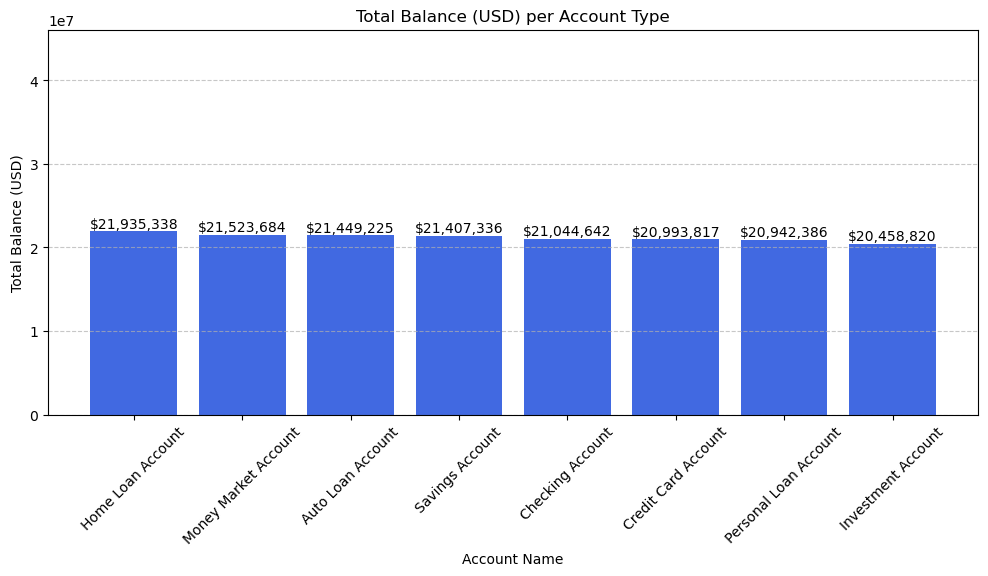

In [20]:
# Calculating the average balance for each account name

query5 = "SELECT a.Accountname, SUM(a.Balance) AS SumBalance  FROM Customers c JOIN Accounts a ON c.CustomerId = a.CustomerId GROUP BY a.Accountname ORDER BY SumBalance DESC;"
df_read5 = pd.read_sql(query5, con=engine)
df_read5



# Plotting the bar chart
plt.figure(figsize=(12, 5))  # Sets the figure size
bars = plt.bar(df_read5['Accountname'], df_read5['SumBalance'], color='royalblue')  # Creates a bar chart

# Annotating each bar with the average balance
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', 
             ha='center', va='bottom', fontsize=10)  # Annotating with formatted balance

plt.xlabel('Account Name')  # X-axis label
plt.ylabel('Total Balance (USD)')  # Y-axis label
plt.title('Total Balance (USD) per Account Type')  # Chart title
plt.xticks(rotation=45)  # Rotates X-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a grid for easier estimation of values

# Set y-axis limit to zoom in and highlight differences
max_balance = df_read5['SumBalance'].max()
plt.ylim(0, max_balance * 2.1)  # Adjust 1.1 to a suitable factor to fit the highest bar

plt.show()

In [23]:
#To explore the correlation between 'CardLimit' and 'Debt' in the 'Cards' table (ANSWER:  there is no correlation)

query6 = """
SELECT
    (COUNT(*) * SUM(c.CardLimit * c.Debt) - SUM(c.CardLimit) * SUM(c.Debt)) /
    (SQRT(COUNT(*) * SUM(c.CardLimit * c.CardLimit) - SUM(c.CardLimit) * SUM(c.CardLimit)) *
     SQRT(COUNT(*) * SUM(c.Debt * c.Debt) - SUM(c.Debt) * SUM(c.Debt))) AS Correlation_Coefficient
FROM Cards c;
"""
df_read6 = pd.read_sql(query6, con=engine)
df_read6


,Correlation_Coefficient
0,-0.000497


In [24]:
#To analyze the top 100 most risky customers based on high credit card debt and low balance on debit accounts.
query7 = """
WITH DebitBalances AS (
    SELECT CustomerId, SUM(Balance) AS TotalBalance
    FROM Accounts
    WHERE AccountName IN 
    ('Checking Account', 'Savings Account', 
    'Money Market Account', 'Investment Account')
    GROUP BY CustomerId
),
CreditDebt AS (
    SELECT CustomerId, SUM(Debt) AS TotalDebt
    FROM Cards
    GROUP BY CustomerId
)
SELECT 
    db.CustomerId, 
    db.TotalBalance, 
    cd.TotalDebt, 
    (cd.TotalDebt / NULLIF(db.TotalBalance, 0)) 
    AS DebtToBalanceRatio
FROM DebitBalances db
JOIN CreditDebt cd ON db.CustomerId = cd.CustomerId
ORDER BY DebtToBalanceRatio DESC
LIMIT 100;
"""
df_read7 = pd.read_sql(query7, con=engine)
df_read7

,CustomerId,TotalBalance,TotalDebt,DebtToBalanceRatio
0,9889,262.0,7110199.0,27138.1641
1,5125,251.0,6725156.0,26793.4502
2,2275,233.0,6168292.0,26473.3562
3,16272,245.0,6073241.0,24788.7388
4,8507,361.0,8555055.0,23698.2133
...,...,...,...,...
95,8670,1991.0,7667155.0,3850.9066
96,3157,1817.0,6900344.0,3797.6577
97,10277,2130.0,8056305.0,3782.3028
98,4384,2215.0,8367862.0,3777.8158


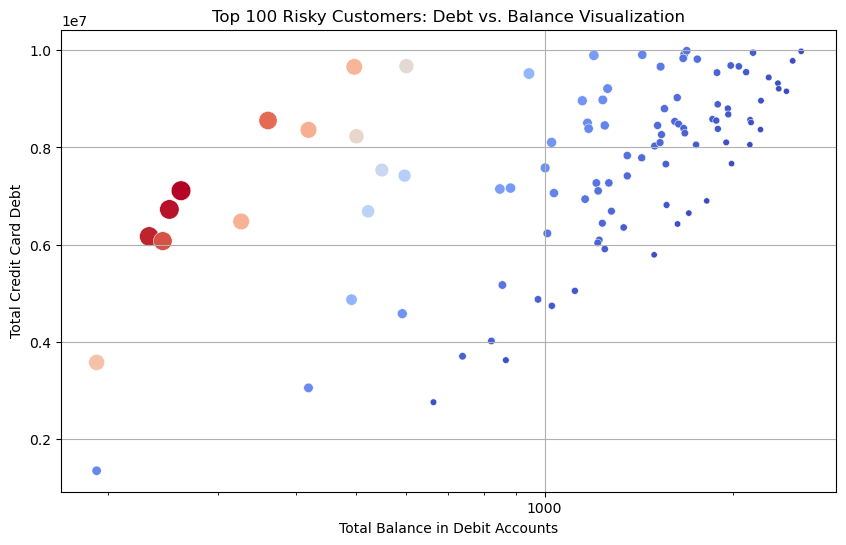

In [27]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_read7, x='TotalBalance', y='TotalDebt',
                size='DebtToBalanceRatio', sizes=(20, 200), 
                hue='DebtToBalanceRatio', palette='coolwarm', legend=None)

plt.title('Top 100 Risky Customers: Debt vs. Balance Visualization')
plt.xlabel('Total Balance in Debit Accounts')
plt.ylabel('Total Credit Card Debt')
plt.grid(True)

# Apply a logarithmic scale
plt.xscale('log')

# Customize tick labels if necessary to improve readability
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()